In [112]:
import math
import cv2
import numpy as np
from matplotlib import pyplot as plt
from queue import Queue
import os, sys
import scipy.spatial as spatial
from scipy.spatial import Voronoi, voronoi_plot_2d
print("done")

done


In [28]:
os.chdir("/Users/joshd/Desktop/QBIhackathon/")
print(os.path.abspath("."))
datadir = "/Users/joshd/Desktop/QBIhackathon/Dapi with RNA dots (10 genes)/Individual FOVs"
print(os.path.isdir(datadir))
print(datadir)

C:\Users\joshd\Desktop\QBIhackathon
True
/Users/joshd/Desktop/QBIhackathon/Dapi with RNA dots (10 genes)/Individual FOVs


In [97]:
def get_nuclei_centroids(copy):
    
    im = copy.copy()
        
    shape_count = 0
        
    queue = Queue()

    shape_coords_all = []
        
    for i in range(len(im)):
        for j in range(len(im[0])):
            if im[i][j] == 0:           #if we find a black pixel, iterate count up
                shape_count += 1
                shape_coords = [(i, j)]
                im[i][j] = 1000         #mark the spot with invalid pixel so it won't be counted again
                queue.put((i, j))
                while not queue.empty():
                    cur_i, cur_j = queue.get()
                    if cur_i - 1 >= 0 and im[cur_i - 1][cur_j] == 0:
                        im[cur_i - 1][cur_j] = 1000
                        queue.put((cur_i - 1, cur_j))
                        shape_coords.append((cur_i - 1, cur_j))
                        
                    if cur_i+1 <= len(im) - 1 and im[cur_i + 1][cur_j] == 0:
                        im[cur_i + 1][cur_j] = 1000
                        queue.put((cur_i + 1, cur_j))
                        shape_coords.append((cur_i + 1, cur_j))
                        
                    if cur_j - 1 >= 0 and im[cur_i][cur_j - 1] == 0:
                        im[cur_i][cur_j - 1] = 1000
                        queue.put((cur_i, cur_j - 1))
                        shape_coords.append((cur_i, cur_j - 1))
                        
                    if cur_j + 1 <= len(im[0]) - 1 and im[cur_i][cur_j + 1] == 0:
                        im[cur_i][cur_j + 1] = 1000
                        queue.put((cur_i, cur_j + 1))  
                        shape_coords.append((cur_i, cur_j + 1))
                
                x_sum, y_sum = 0, 0
                for coord in shape_coords:
                    x_sum += coord[0]
                    y_sum += coord[1]
                centroid = int(round(x_sum / len(shape_coords))), int(round(y_sum / len(shape_coords)))
                shape_coords_all.append(centroid)
        

    return shape_coords_all

print("created")

created


(2048, 2048)


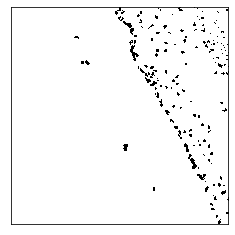

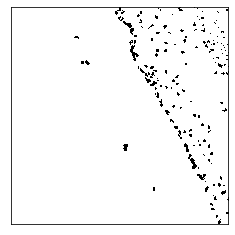

<Subdiv2D 00000273D9626F70>
[(8, 1727), (0, 1875), (29, 1591), (26, 1026), (10, 1742), (12, 1866), (21, 1388), (16, 1735), (16, 1767), (17, 1766), (23, 1752), (55, 1050), (28, 1388), (38, 2030), (36, 986), (37, 1405), (32, 1889), (37, 1396), (39, 2010), (44, 1006), (40, 1993), (41, 1394), (47, 1936), (43, 1766), (46, 1951), (51, 1794), (63, 988), (61, 1222), (48, 1767), (49, 1769), (50, 1781), (51, 1769), (52, 1782), (52, 1972), (57, 1936), (60, 1950), (73, 1521), (71, 1767), (75, 1944), (80, 1765), (91, 1196), (83, 1754), (86, 1870), (85, 1827), (86, 1826), (89, 1738), (103, 1368), (112, 1020), (96, 1774), (99, 1752), (113, 1799), (100, 1283), (125, 1043), (109, 1820), (128, 1773), (143, 1218), (131, 1788), (137, 1929), (173, 1098), (154, 1910), (148, 1848), (146, 1849), (147, 1844), (147, 1994), (172, 1722), (158, 1844), (156, 1998), (159, 2007), (162, 1858), (162, 1981), (167, 1921), (191, 1315), (181, 1806), (178, 1922), (194, 1447), (187, 1910), (188, 1792), (190, 1792), (198, 123

In [117]:
#https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html
#image is 2048x2048 with grayscale
dapitest = cv2.imread("OnlyDapi/AR95_DAPI.tif", 0)
# dapitest = cv2.imread("mouse brain (one FOV).tif", 0)
print(dapitest.shape)
# dapiNP = np.array(dapitest)
ret,thresh1 = cv2.threshold(dapitest,0,255,cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
#try using adaptive gaussian for thresholding



#plot without the seeds
plt.imshow(thresh1,'gray')
plt.xticks([]),plt.yticks([])
plt.show()

#plot with the seeds on the plot
plt.imshow(thresh1, 'gray')
# plt.imshow(points, 'red')
plt.xticks([]),plt.yticks([])
plt.show()

# prepare the Subdiv2D object for later construction
size = dapitest.shape
rect = (0, 0, size[1], size[0])
subdiv  = cv2.Subdiv2D(rect)
print(subdiv)

seeds = get_nuclei_centroids(thresh1)
print(seeds)

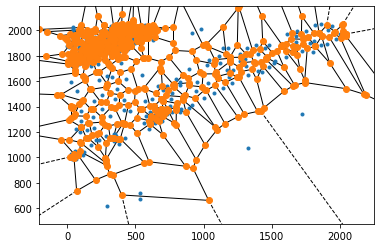

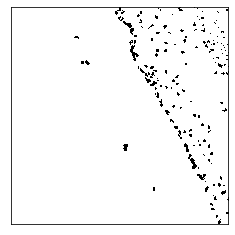

In [110]:

#perform voronoi on points
vor = spatial.Voronoi(seeds)
voronoi_plot_2d(vor)
plt.show()

print(vor) 

#plot voronoi shapes on top of cells
plt.imshow(thresh1, 'gray')
# plt.imshow(points, 'red')
plt.xticks([]),plt.yticks([])
plt.show()


In [ ]:
# now that we can do dapi, let's accumulate points of color within those segmented regions!




#image is 1366x1366
#there are 10 channels (1 for each gene)
# testimg = cv2.imread(datadir+"/AY79_SpotsOnDapi.tif")
# size = testimg.shape
# print(size)




In [59]:
# Rectangle to be used with Subdiv2D
size = img.shape
rect = (0, 0, size[1], size[0])

# Create an instance of Subdiv2D
subdiv = cv2.Subdiv2D(rect);

# Create an array of points.
points = [];

# Read in the points from a text file
with open("points.txt") as file :
    for line in file :
        x, y = line.split()
        points.append((int(x), int(y)))

# Insert points into subdiv
for p in points :
    subdiv.insert(p)

    # Show animation
    if animate :
        img_copy = img_orig.copy()
        # Draw delaunay triangles
        draw_delaunay( img_copy, subdiv, (255, 255, 255) );
        cv2.imshow(win_delaunay, img_copy)
        cv2.waitKey(100)

# Draw delaunay triangles
draw_delaunay( img, subdiv, (255, 255, 255) );

# Draw points
for p in points :
    draw_point(img, p, (0,0,255))

# Allocate space for Voronoi Diagram
img_voronoi = np.zeros(img.shape, dtype = img.dtype)

# Draw Voronoi diagram
draw_voronoi(img_voronoi,subdiv)

# Show results
cv2.imshow(win_delaunay,img)
cv2.imshow(win_voronoi,img_voronoi)
cv2.waitKey(0)

FileNotFoundError: [Errno 2] No such file or directory: 'points.txt'

In [81]:
print(thresh1)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [232 255 255 ... 255 255 255]
 [232 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
